In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt 

import scipy.stats as stats


In [2]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:
df=pd.read_csv(r'c:\Users\Utsav\Downloads\concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.shape

(1030, 9)

In [6]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
x=df.iloc[:,:8]
y=df['Strength']

In [9]:
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [10]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
model=LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
model.score(x_test,y_test)

0.5924965716842449

In [15]:
r2_score(y_test,model.predict(x_test))

0.5924965716842449

In [16]:
model1=LinearRegression()

In [17]:
np.mean(cross_val_score(model1,x,y,cv=5,scoring='r2'))

0.46099404916628683

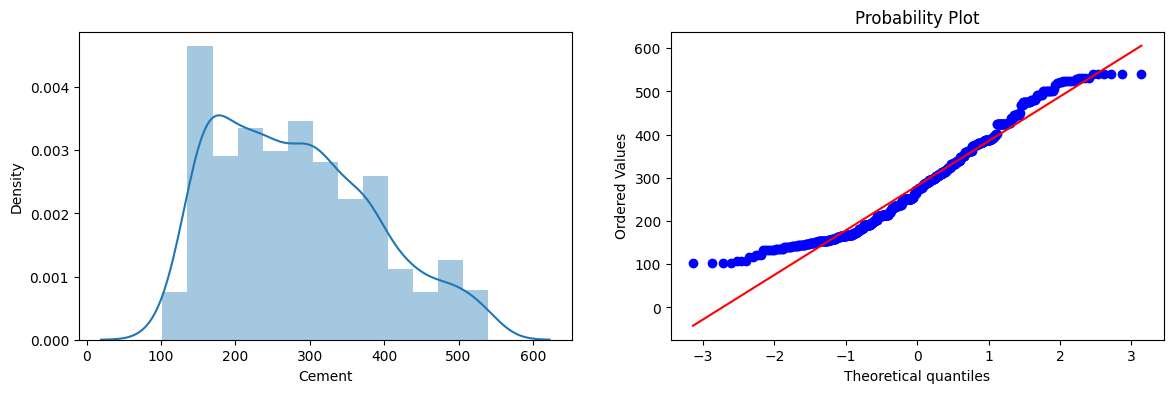

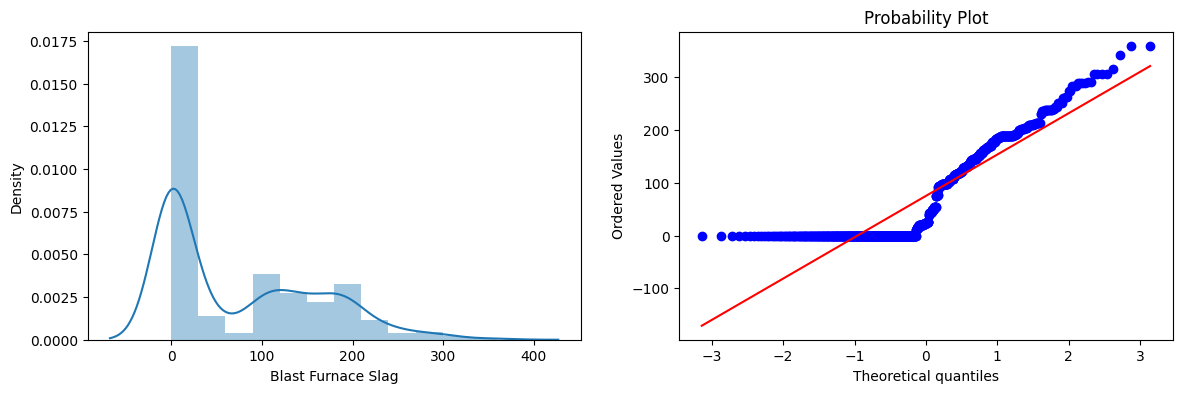

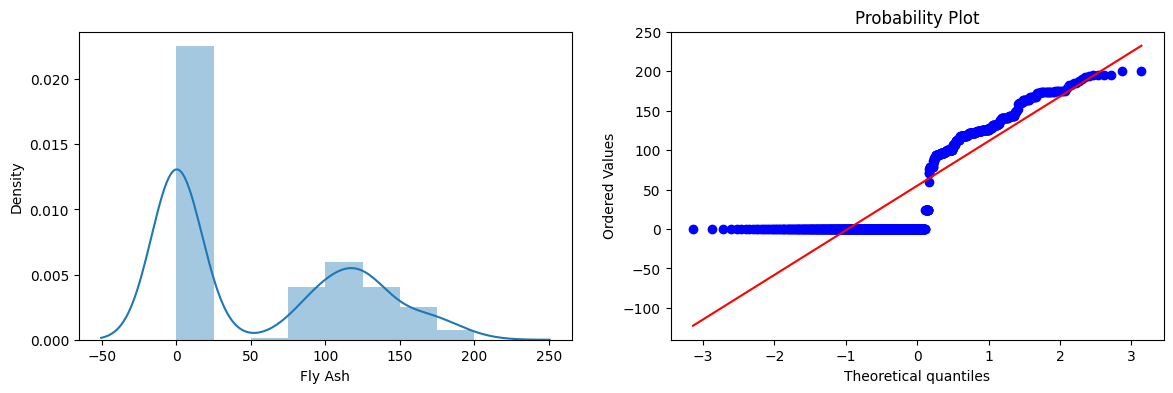

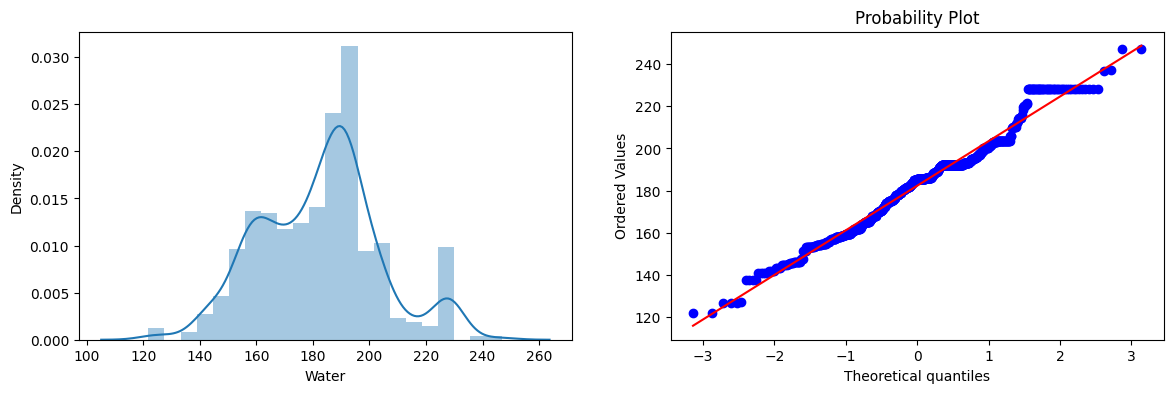

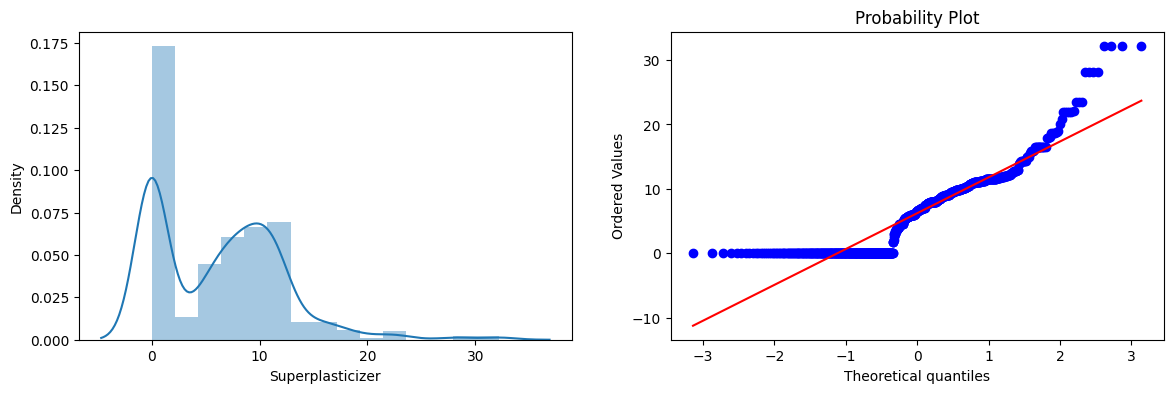

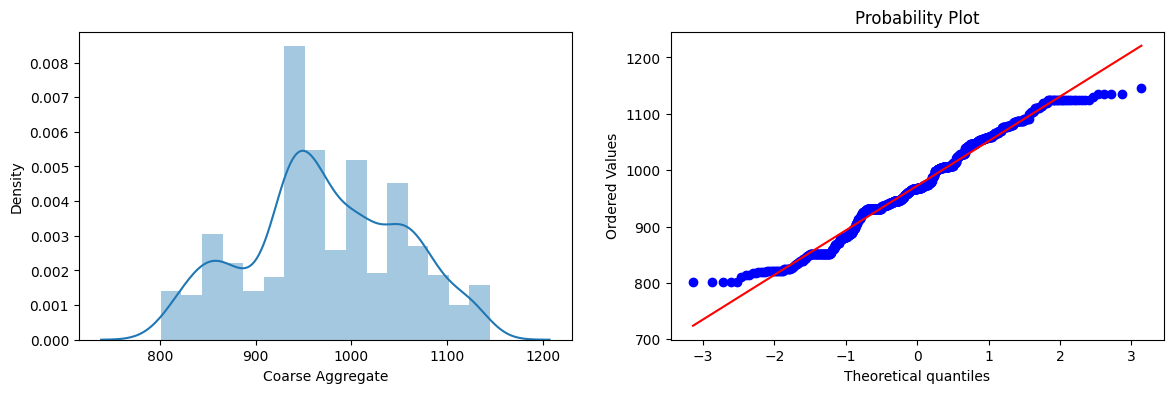

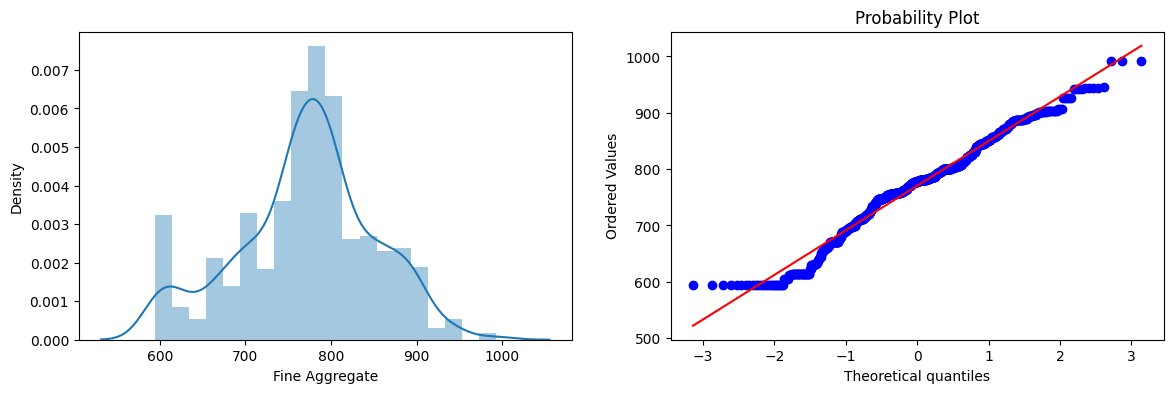

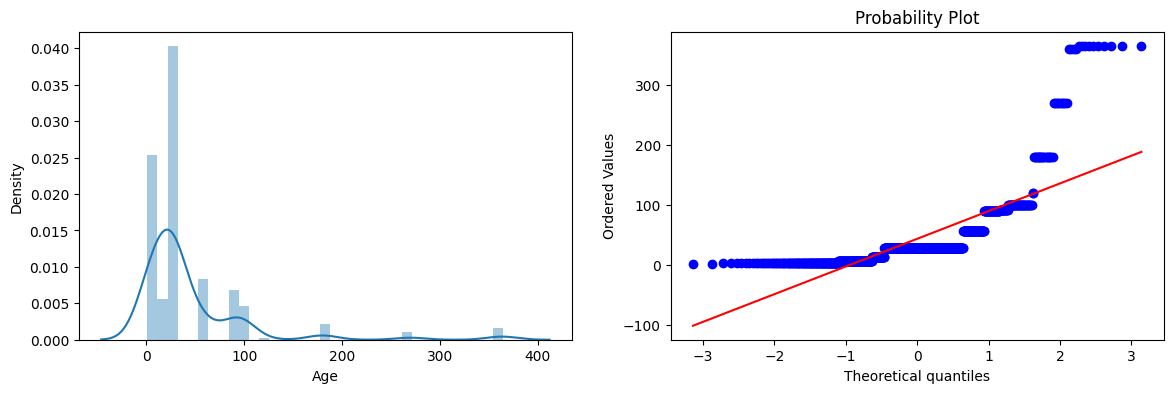

In [18]:
import warnings
import matplotlib.pyplot as plt

# Filter out MatplotlibDeprecationWarning
warnings.filterwarnings("ignore")

# Your plotting code here...

for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.distplot(x_train[col])
    plt.subplot(1,2,2)
    stats.probplot(x_train[col],dist='norm',plot=plt)

    plt.show()


In [19]:
pt=PowerTransformer(method='box-cox')

x_train_transformed=pt.fit_transform(x_train+0.000001)
x_test_transformed=pt.fit_transform(x_test+0.000001)

In [20]:
# Applying box cox transform
pd.DataFrame({'cols':x_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.209587
1,Blast Furnace Slag,-0.007639
2,Fly Ash,-0.044486
3,Water,1.549273
4,Superplasticizer,0.094469
5,Coarse Aggregate,1.163229
6,Fine Aggregate,2.092513
7,Age,0.052151


In [21]:
model2=LinearRegression()

In [22]:
model2.fit(x_train_transformed,y_train)
model2.score(x_test_transformed,y_test)

0.7805892580841279

In [23]:
model3=LinearRegression()

In [24]:
pt1=PowerTransformer(method='box-cox')

In [25]:
x1=pt1.fit_transform(x+0.0000001)

In [26]:
cross_val_score(model3,x1,y,cv=5).mean()

0.6658537942219857

In [27]:
x2=pd.DataFrame(x_train_transformed,columns=x_train.columns)

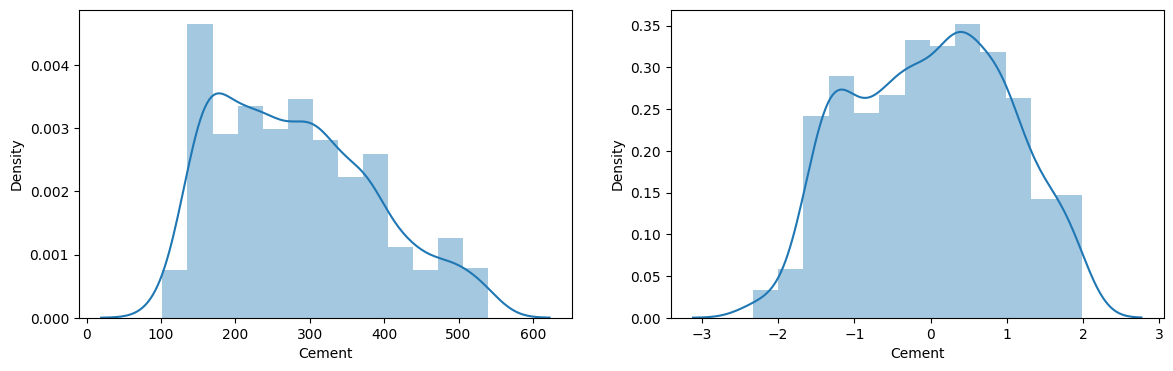

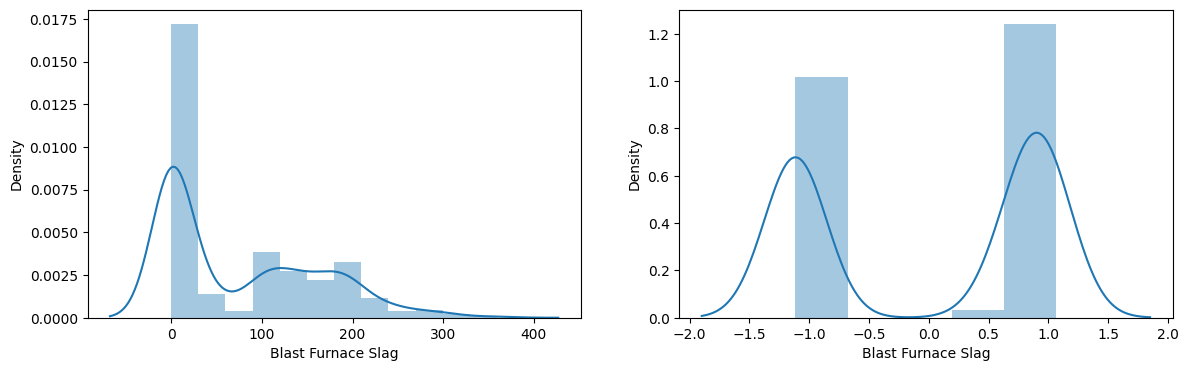

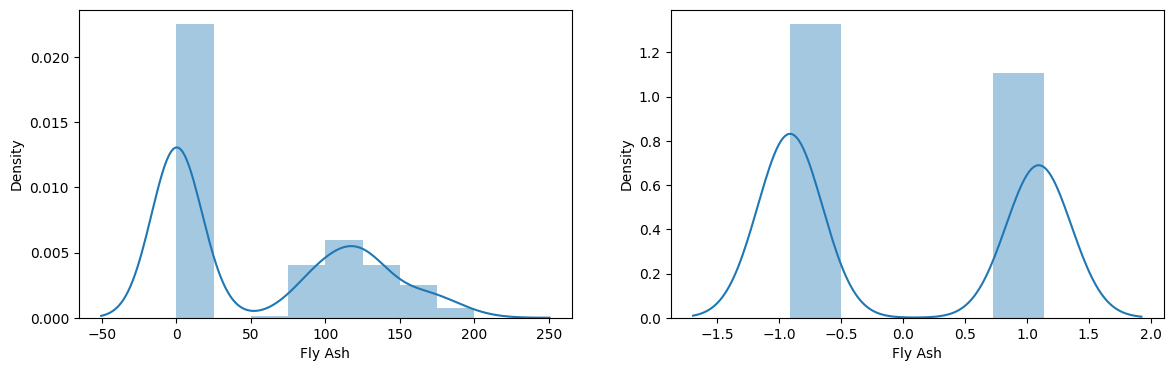

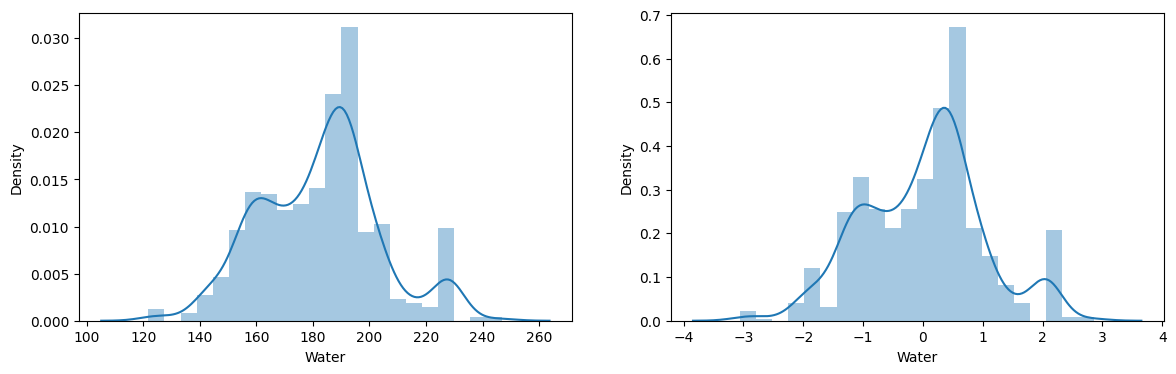

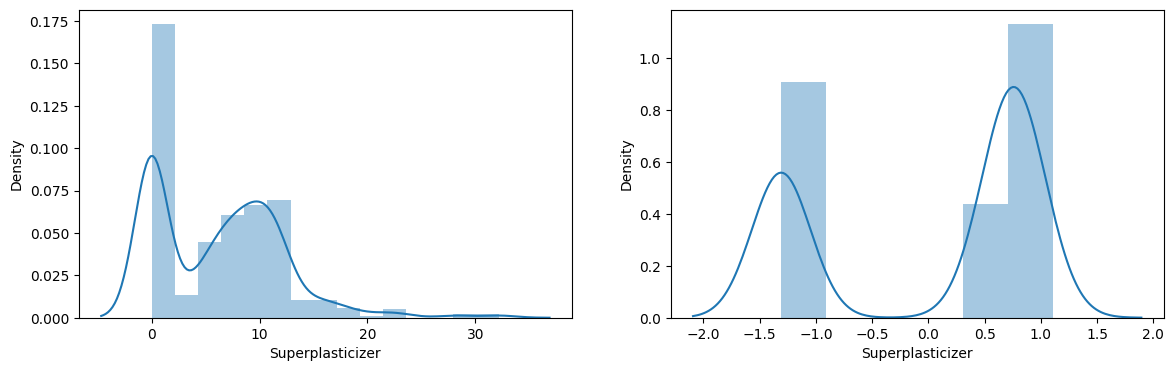

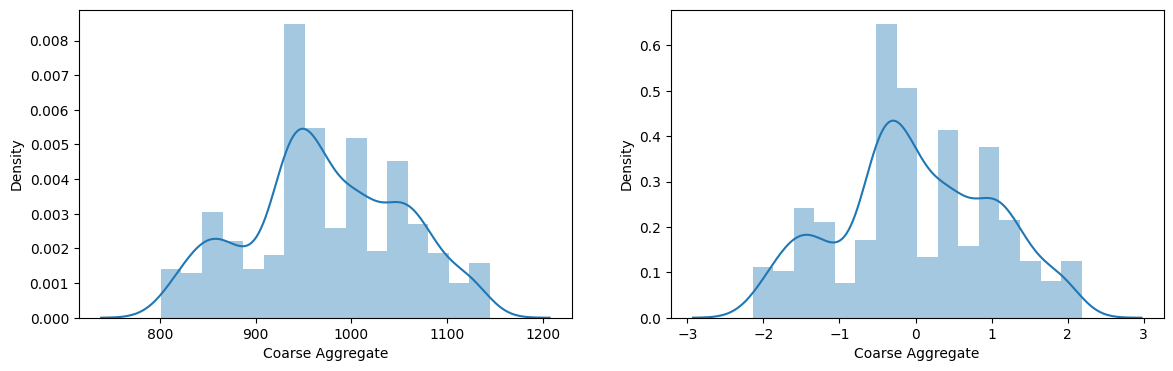

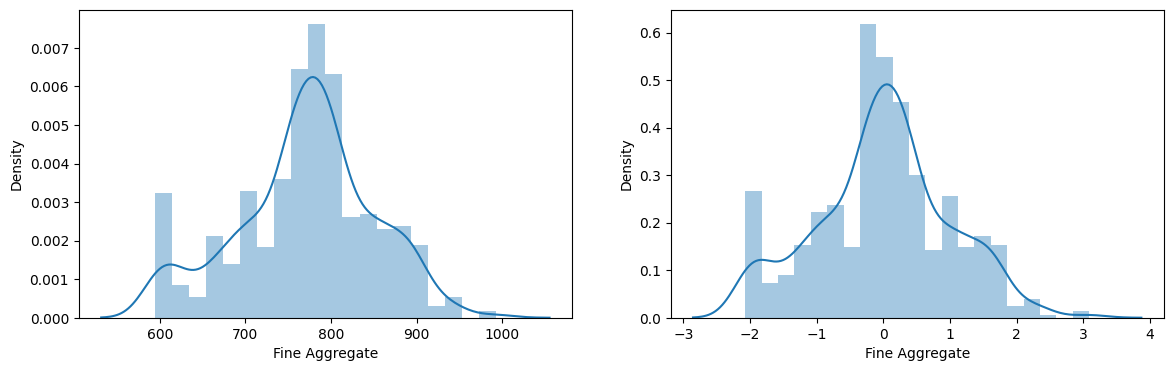

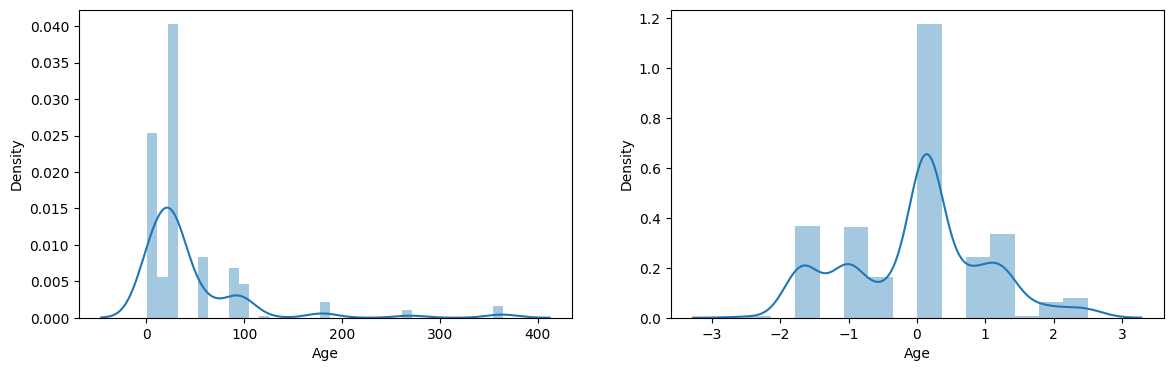

In [28]:
import warnings
import matplotlib.pyplot as plt

# Filter out MatplotlibDeprecationWarning
warnings.filterwarnings("ignore")

# Your plotting code here...

for col in x2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.distplot(x_train[col])
    plt.subplot(1,2,2)
    #stats.probplot(x_train[col],dist='norm',plot=plt)
    sns.distplot(x2[col])

    plt.show()


In [29]:
pt1=PowerTransformer()

In [30]:
x_train_1=pt1.fit_transform(x_train)
x_test_1=pt1.transform(x_test)

In [31]:
model4=LinearRegression()

In [32]:
model4.fit(x_train_1,y_train)

LinearRegression()

In [33]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
853,318.0,0.0,126.0,210.0,6.0,861.0,737.0,28
733,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,28
835,144.0,0.0,175.0,158.0,18.0,943.0,844.0,28
814,310.0,0.0,0.0,192.0,0.0,970.0,850.0,360
868,276.0,116.0,90.0,180.0,9.0,870.0,768.0,28
...,...,...,...,...,...,...,...,...
896,313.0,161.0,0.0,178.0,10.0,917.0,759.0,28
574,135.7,203.5,0.0,185.7,0.0,1076.2,759.3,7
769,331.0,0.0,0.0,192.0,0.0,978.0,825.0,360
323,249.1,0.0,98.8,158.1,12.8,987.8,889.0,100


In [34]:
model.score(x_test_1,y_test)

-8.854446035712801